 #### Refaire l'expèrience en utilisant des petits $B_\theta$ (<15°)

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio
import random
from psychopy import visual, core, event, gui, data
import MotionClouds as MC
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
exp_name = "Perception de l'orientation"
exp_info = {'participant':''}
subj_info = gui.DlgFromDict(dictionary=exp_info, title=exp_name)
exp_info['exp_name']=exp_name


In [3]:
downscale = 1
fig_width = 21
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

In [4]:
#from psychopy import visual, core, event
#import MotionClouds as MC

test_length = 150  # number of trials
fixation_length = .5  # length of fixation, in second
stim1_length = 0.25  # length of first stim, in second
stim2_length = 0.25  # length of the second stim, in second 

fullscr = False

fullscr = True


In [5]:
def generate_random_cloud(theta, B_theta, downscale = 1):
    fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,
                             B_V=0, theta=theta, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
    im = (mc.rectif(im) * 255).astype('uint8')
    fname = 'tmp/%s_%s.png' % (theta, B_theta)
    imageio.imwrite(fname, im[:, :, 0])
    return fname


In [6]:
win = visual.Window(fullscr=fullscr, color=[0,0,0], winType='pygame', monitor='testMonitor', units='height')
mouse = event.Mouse(visible=False)

fixation = visual.ShapeStim(vertices='cross', win=win, size=0.05, pos=[0, 0], fillColor='black', units='height')
fixation.autolog = False

MC1 = generate_random_cloud(np.pi/2, B_theta=np.pi/2)
bitmap1 = visual.ImageStim(win, MC1, mask='gauss', size=0.8, units='height')
bitmap1.autolog = False 

msg = visual.TextStim(win, text='?', color='black')

import time
start_time = time.time()
print("Test started")


ans_list = []
N_B_thetas = 3
B_thetas = np.pi*np.logspace(-7, -3.5, N_B_thetas, base=2)
    
std_theta = np.pi/6
for trial in range(test_length):
    clock = core.Clock()
    fixation.draw()
    win.flip()
    
    theta = std_theta * np.random.randn()

    # MC generation
    B_theta = B_thetas[random.randint(0, N_B_thetas-1)]

    MC1 = generate_random_cloud(np.pi/2-theta, B_theta=B_theta) 
    bitmap1.setImage(MC1)

    # Times the trial
    while clock.getTime() < fixation_length + stim1_length + stim2_length:
        if 0.0 <= clock.getTime() < fixation_length:  # fixation
            fixation.draw()
        if fixation_length + 0.01 <= clock.getTime() < fixation_length + stim1_length: 
            bitmap1.draw()
            win.flip()
        if fixation_length + stim1_length <= clock.getTime() < fixation_length + stim1_length + stim2_length:
            msg.draw()
            

   
    win.flip()

    while True:
        ans = event.getKeys()   #waitKeys à la base
        mouse_pressed = pygame.mouse.get_pressed()
        
        if ans == ['escape', 'q']:
            win.close()
            core.quit()
        
        elif mouse_pressed[2]==1:
             correct = (np.sign(theta) > 0) and mouse_pressed[2]==1
             print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ', 
             mouse_pressed,'(correct=', correct, ' );bandwidth=', '%.3f' % (B_theta*180/np.pi))   
             break
        
        elif mouse_pressed[0]==1:
             correct = (np.sign(theta) < 0) and mouse_pressed[0]==1
             print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ', 
             mouse_pressed,'(correct=', correct, ' );bandwidth=', '%.3f' % (B_theta*180/np.pi))   
             break        
       
    # Output shape per trial is : trial number, shift direction, answered shift and b_theta
    ans_list.append([trial, theta, mouse_pressed, B_theta])

win.close()

Test started
At trial  0 Angle= 11.534 answer is  (0, 0, 1) (correct= True  );bandwidth= 4.730
At trial  1 Angle= 38.997 answer is  (0, 0, 1) (correct= True  );bandwidth= 4.730
At trial  2 Angle= -14.817 answer is  (1, 0, 0) (correct= True  );bandwidth= 15.910
At trial  3 Angle= 19.417 answer is  (0, 0, 1) (correct= True  );bandwidth= 15.910
At trial  4 Angle= 34.851 answer is  (0, 0, 1) (correct= True  );bandwidth= 1.406
At trial  5 Angle= 6.105 answer is  (0, 0, 1) (correct= True  );bandwidth= 4.730
At trial  6 Angle= 2.059 answer is  (0, 0, 1) (correct= True  );bandwidth= 15.910
At trial  7 Angle= 11.164 answer is  (0, 0, 1) (correct= True  );bandwidth= 4.730
At trial  8 Angle= 38.038 answer is  (0, 0, 1) (correct= True  );bandwidth= 15.910
At trial  9 Angle= -30.406 answer is  (1, 0, 0) (correct= True  );bandwidth= 1.406
At trial  10 Angle= 24.495 answer is  (0, 0, 1) (correct= True  );bandwidth= 15.910
At trial  11 Angle= 2.845 answer is  (0, 0, 1) (correct= True  );bandwidth= 1.4

In [7]:
import pickle
pickle.dump(ans_list, open('Psychophys_discrim_%s.p' % exp_info['participant'], 'wb'))


In [9]:
import pickle
import matplotlib.pyplot as plt

subj_name_list =  ['JF12'] #changer et mettre le nom de nouveaux participants

                
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open(r'C:\Users\Utilisateur\Documents\github\Msc-Internship\Msc-Internship\Notebooks\W06\Psychophys_discrim_%s.p'%subject, 'rb'))

    subj_data_list.append(x)

No handles with labels found to put in legend.


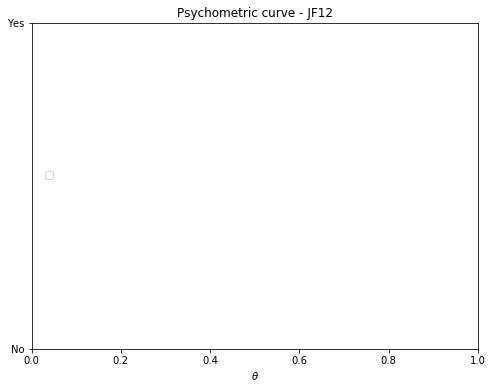

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if  i[2] == '(0,0,1)':  
                        y.append(1)
                else :
                        y.append(0)
                
                
                
                #if  i[2] == 'right':  
                #        y.append(1)
                #else :
                #        y.append(0)
      
        X = np.asarray(X)
        X = X[:,np.newaxis]
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

In [18]:
print(X)

[[-14.81726343]
 [ 19.41655   ]
 [  2.05885967]
 [ 38.0375777 ]
 [ 24.49529912]
 [-25.00967903]
 [ -6.43634847]
 [-20.3395283 ]
 [ -1.62953659]
 [ 46.62542312]
 [-42.55210245]
 [-17.65699492]
 [-45.56473624]
 [ 37.80638964]
 [ 50.79999499]
 [-27.42849568]
 [ 28.64790975]
 [-39.41625294]
 [ 24.1860456 ]
 [ 14.56986688]
 [ 42.62171995]
 [-27.74506729]
 [  3.22905145]
 [-10.58680128]
 [ 38.70382515]
 [ 13.87424388]
 [  3.18889811]
 [  3.99279131]
 [-19.65938503]
 [ 40.81812655]
 [-39.75252674]
 [ 25.46568445]
 [-33.76387295]
 [ 50.01008431]
 [ -3.77055426]
 [-44.73431192]
 [  2.89396565]
 [ 26.52009692]
 [ 19.52395505]
 [-32.28067698]
 [  6.07740151]
 [-33.24677881]
 [ 51.34314513]
 [ 10.20958655]
 [ -2.6772819 ]
 [-19.52514123]
 [-53.93457306]]
